In [1]:
import tensorflow as tf

from six.moves import xrange 
from constants import IMAGE_PIXELS, OUTPUT

# Data
from input_data import read_data_sets

# Model
import model as model

from datetime import datetime

In [2]:
data = read_data_sets(f=1)

In [3]:
class FLAGS:
    pass

FLAGS.hidden1 = 256
FLAGS.hidden2 = 128

FLAGS.batch_size = 100
FLAGS.learning_rate = 0.01
FLAGS.epochs = 10
FLAGS.logs_path = "/tmp/tensorflow_logs/example/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"

In [4]:
def fill_feed_dict(data_set, images_pl, labels_pl):
    # Create the feed_dict for the placeholders filled with the next
    # batch_size examples.
    images_feed, labels_feed = data_set.next_batch(FLAGS.batch_size)
    feed_dict = {
        images_pl: images_feed,
        labels_pl: labels_feed,
    }
    return feed_dict

In [5]:
def do_eval(sess, eval_correct, images_placeholder, y_placeholder, data_set):
    # Runs one evaluation against the full epoch of data.
    score = 0
    steps_per_epoch = data_set.num_examples // FLAGS.batch_size
    for i in xrange(steps_per_epoch):
        feed_dict = fill_feed_dict(data_set, images_placeholder, y_placeholder)
        score += sess.run(eval_correct, feed_dict=feed_dict)
    score = float(score) / steps_per_epoch
    print('Score: %0.04f' % score)

In [6]:
import model
reload(model)
tf.reset_default_graph()

with tf.name_scope('input'):
    images_placeholder = tf.placeholder(tf.float32, shape=(None, IMAGE_PIXELS), name="input")
with tf.name_scope('output'):
    y_placeholder = tf.placeholder(tf.float32, shape=(None, OUTPUT), name="output")
    
y = model.inference(images_placeholder, FLAGS.hidden1, FLAGS.hidden2)
loss = model.loss(y, y_placeholder)
train_op = model.training(loss, FLAGS.learning_rate)
eval_correct = model.evaluation(y, y_placeholder)
init = tf.global_variables_initializer()
data.train.reset_epochs()
#sess = tf.Session()
sess = tf.InteractiveSession()
sess.run(init)
ep = 0
# Create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()

FLAGS.batch_size = 100
FLAGS.learning_rate = 0.01
FLAGS.epochs = 10
FLAGS.logs_path = "/tmp/tensorflow_logs/example/" + datetime.now().strftime("%Y%m%d-%H%M%S") + "/"

In [7]:
# op to write logs to Tensorboard
summary_writer = tf.summary.FileWriter(FLAGS.logs_path, graph=tf.get_default_graph())

# Training cycle
k = 0
while k < 10:#FLAGS.epochs:
    steps_per_epoch = data.train.num_examples/FLAGS.batch_size
    for i in range(steps_per_epoch):
        batch_xs, batch_ys = data.train.next_batch(FLAGS.batch_size)
        feed_dict={images_placeholder: batch_xs, y_placeholder: batch_ys}

        _, loss_value = sess.run([train_op, loss], feed_dict=feed_dict)

    if ep % 1 == 0:
        # Evaluate against the training set.
        print "Epoch: %d Train Data Eval:" % (ep + 1),
        do_eval(sess, eval_correct, images_placeholder, y_placeholder, data.train)
        
        batch_xs, batch_ys = data.train.next_batch(data.train.num_examples)
        feed_dict={images_placeholder: batch_xs, y_placeholder: batch_ys}
        
        summary_str = sess.run(merged_summary_op, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, ep + 1)
        summary_writer.flush()
    k += 1
    ep += 1

Epoch: 1 Train Data Eval: Score: 0.0124
Epoch: 2 Train Data Eval: Score: 0.0121
Epoch: 3 Train Data Eval: Score: 0.0114
Epoch: 4 Train Data Eval: Score: 0.0112
Epoch: 5 Train Data Eval: Score: 0.0115
Epoch: 6 Train Data Eval: Score: 0.0105
Epoch: 7 Train Data Eval: Score: 0.0106
Epoch: 8 Train Data Eval: Score: 0.0103
Epoch: 9 Train Data Eval: Score: 0.0099
Epoch: 10 Train Data Eval: Score: 0.0103


In [8]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Visualization
from plot_samples import plot_samples

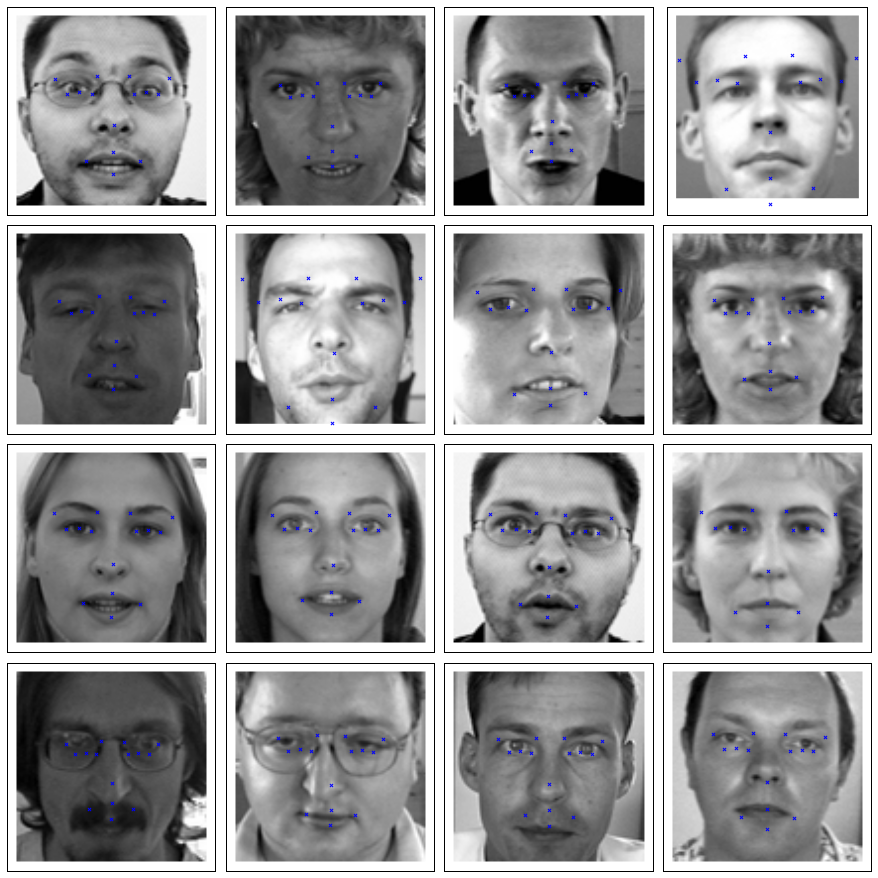

In [9]:
X_pred = data.predict.images
y_pred = sess.run(y, feed_dict={images_placeholder: X_pred})
plot_samples(X_pred, y_pred)

In [10]:
from write_submission import write_submission

In [11]:
y_pred = sess.run(y, feed_dict={images_placeholder: X_pred})

In [12]:
write_submission(y_pred)

Wrote submission/submission-2017-01-10T01-41-25.518188.csv
